In [1]:
# Download Data
!git clone https://github.com/deeplearningzerotoall/PyTorch.git
!mv PyTorch/custom_data/origin_data/ ./

print('\n>>> Present directory :')
!ls

Cloning into 'PyTorch'...
remote: Enumerating objects: 1899, done.
remote: Total 1899 (delta 0), reused 0 (delta 0), pack-reused 1899
Receiving objects: 100% (1899/1899), 80.33 MiB | 38.33 MiB/s, done.
Resolving deltas: 100% (242/242), done.

>>> Present directory :
origin_data  PyTorch  sample_data


In [2]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import random
from matplotlib.pyplot import imshow
import os

# check device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# set seed for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

torch.__version__, device

('1.7.0+cu101', 'cpu')

## ImageFolder
- 원본 사진이 256x512 사이즈의 고해상도 사진이므로, 용량을 낮추기 위해 64x128 사이즈로 변환해 저장
- torchvision.transforms.Compose() 를 사용하면 여러 단계의 transform을 묶어 한 번에 적용 가능

In [3]:
trans = transforms.Compose([
    transforms.Resize((64, 128))
])

train_data = torchvision.datasets.ImageFolder(root='origin_data/', transform=trans)
train_data

Dataset ImageFolder
    Number of datapoints: 551
    Root location: origin_data/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 128), interpolation=PIL.Image.BILINEAR)
           )

<PIL.Image.Image image mode=RGB size=128x64 at 0x7F84EF0BCB50> 0


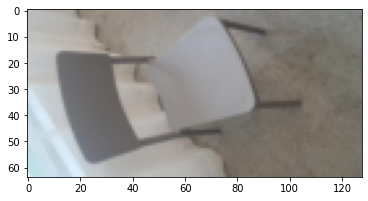

In [4]:
# picture of gray chair
img, label = train_data[0]
print(img, label)
imshow(img)

<PIL.Image.Image image mode=RGB size=128x64 at 0x7F84EE478590> 1


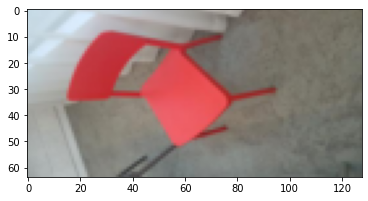

In [5]:
# picture of red chair
img, label = train_data[500]
print(img, label)
imshow(img)

In [6]:
os.makedirs('train_data/red/', exist_ok=True)
os.makedirs('train_data/gray/', exist_ok=True)

for idx, data in enumerate(train_data):
  img, label = data

  pic_num = f'00{idx}'[-3:]
  if label == 0:
    img.save(f'train_data/gray/{pic_num}_{label}.jpeg')
  elif label==1:
    img.save(f'train_data/red/{pic_num}_{label}.jpeg')
  else:
    print(f'idx {idx} has strange label - {label}')

print('\n>>> gray pictures : ')
!ls train_data/gray/

print('\n>>> red pictures : ')
!ls train_data/red/


>>> gray pictures : 
000_0.jpeg  055_0.jpeg	110_0.jpeg  165_0.jpeg	220_0.jpeg  275_0.jpeg
001_0.jpeg  056_0.jpeg	111_0.jpeg  166_0.jpeg	221_0.jpeg  276_0.jpeg
002_0.jpeg  057_0.jpeg	112_0.jpeg  167_0.jpeg	222_0.jpeg  277_0.jpeg
003_0.jpeg  058_0.jpeg	113_0.jpeg  168_0.jpeg	223_0.jpeg  278_0.jpeg
004_0.jpeg  059_0.jpeg	114_0.jpeg  169_0.jpeg	224_0.jpeg  279_0.jpeg
005_0.jpeg  060_0.jpeg	115_0.jpeg  170_0.jpeg	225_0.jpeg  280_0.jpeg
006_0.jpeg  061_0.jpeg	116_0.jpeg  171_0.jpeg	226_0.jpeg  281_0.jpeg
007_0.jpeg  062_0.jpeg	117_0.jpeg  172_0.jpeg	227_0.jpeg  282_0.jpeg
008_0.jpeg  063_0.jpeg	118_0.jpeg  173_0.jpeg	228_0.jpeg  283_0.jpeg
009_0.jpeg  064_0.jpeg	119_0.jpeg  174_0.jpeg	229_0.jpeg  284_0.jpeg
010_0.jpeg  065_0.jpeg	120_0.jpeg  175_0.jpeg	230_0.jpeg  285_0.jpeg
011_0.jpeg  066_0.jpeg	121_0.jpeg  176_0.jpeg	231_0.jpeg  286_0.jpeg
012_0.jpeg  067_0.jpeg	122_0.jpeg  177_0.jpeg	232_0.jpeg  287_0.jpeg
013_0.jpeg  068_0.jpeg	123_0.jpeg  178_0.jpeg	233_0.jpeg  288_0.jpeg
014_0.jpeg  